In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

In [174]:
data = pd.read_csv('D:\\Academic\\sem 6\\ML\\Lab\\lab 7\\drug200.csv')

In [175]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [176]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


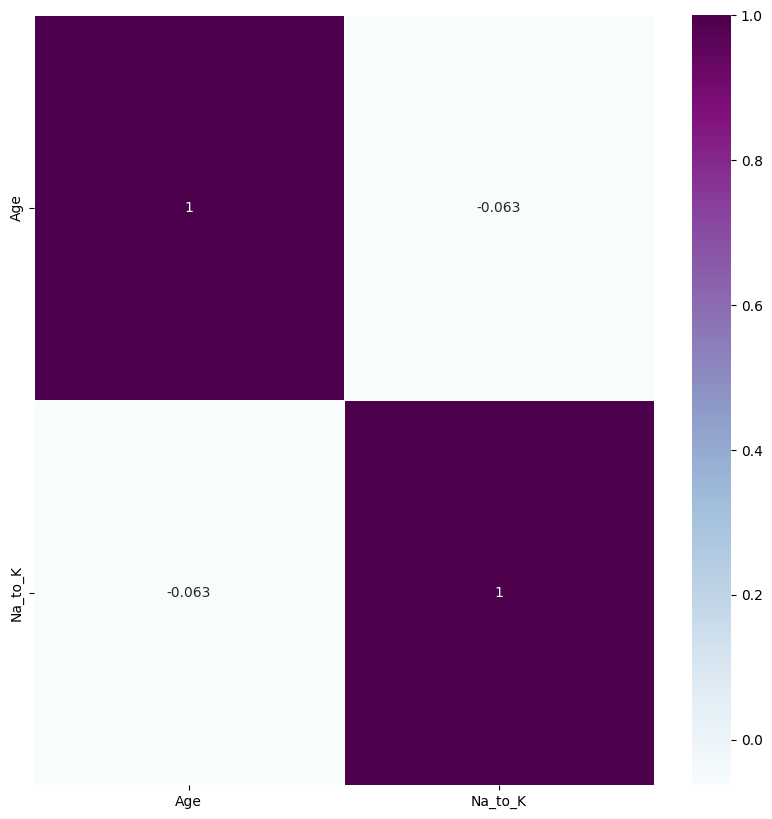

In [178]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(data.corr(), cmap = 'BuPu', cbar = True, linewidth = 0.5, annot = True)
plt.show()


In [179]:
data['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<Axes: xlabel='Drug', ylabel='count'>

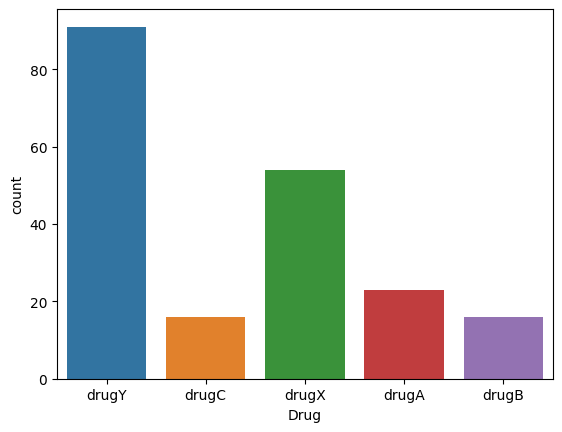

In [180]:
sns.countplot(x = 'Drug', data= data)


<Axes: xlabel='Drug', ylabel='count'>

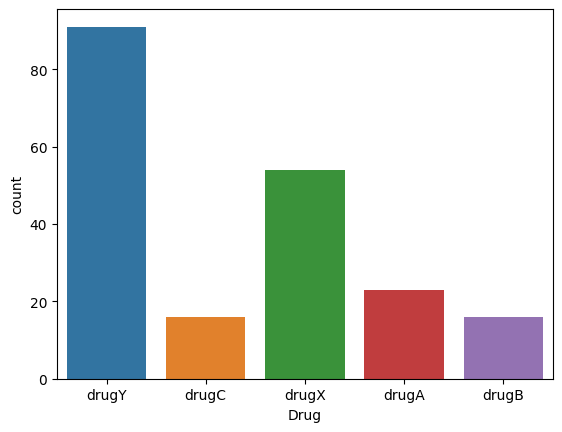

In [181]:
sns.countplot(x = 'Drug', data= data)

<Axes: xlabel='Sex', ylabel='count'>

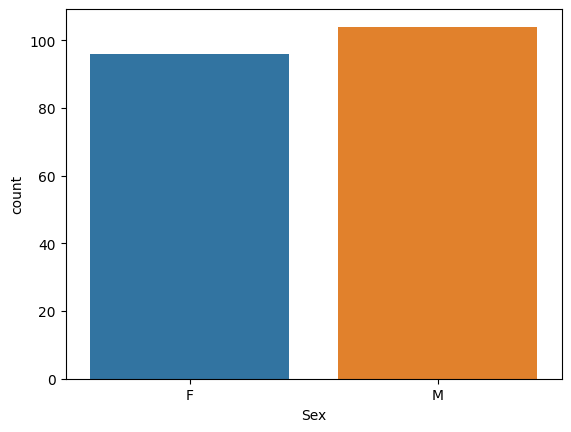

In [182]:
sns.countplot(x = 'Sex', data= data)

In [183]:
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

<Axes: xlabel='BP', ylabel='count'>

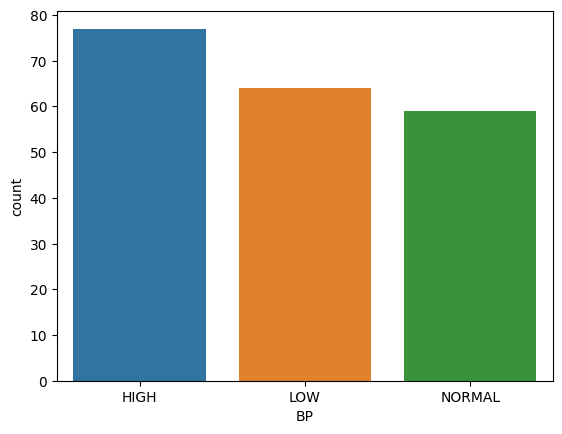

In [184]:
sns.countplot(x = 'BP', data= data)

In [185]:
data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

<Axes: xlabel='Cholesterol', ylabel='count'>

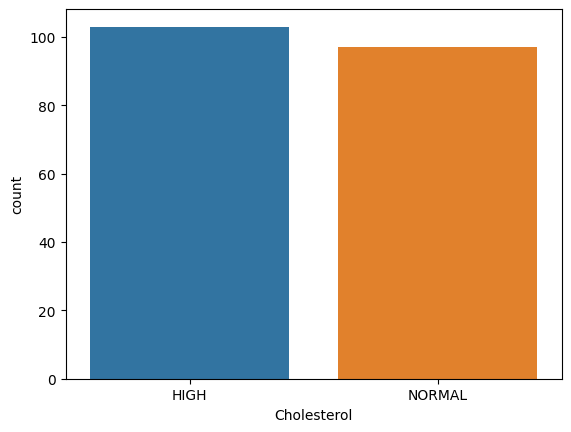

In [186]:
sns.countplot(x = 'Cholesterol', data= data)

In [187]:
data['Na_to_K'].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

<Axes: ylabel='Density'>

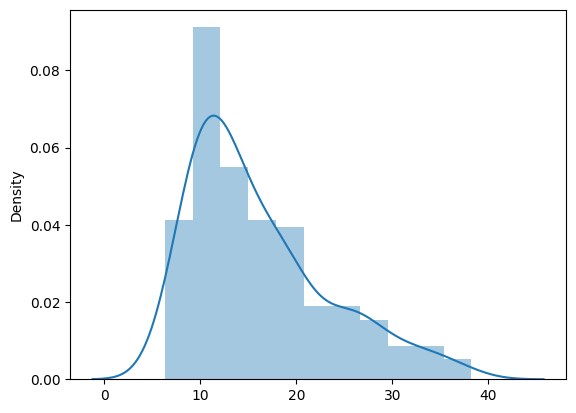

In [188]:
sns.distplot(x = data['Na_to_K'])

<Axes: xlabel='Age', ylabel='Count'>

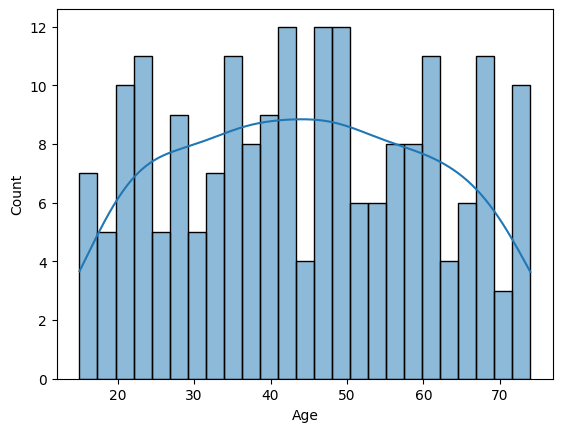

In [189]:
sns.histplot(x = 'Age', kde=True, bins = 25, data = data)

<Axes: xlabel='Age', ylabel='Na_to_K'>

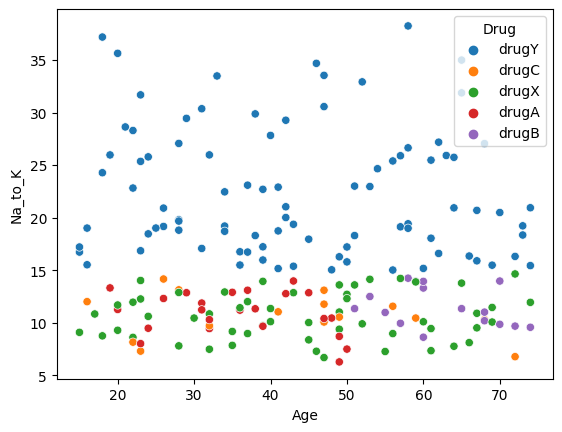

In [190]:
sns.scatterplot(x = 'Age', y = 'Na_to_K', data = data, hue = 'Drug')


In [191]:
data_sex_drug = data.groupby(['Drug','Sex']).size().reset_index(name = 'count')
print(data_sex_drug)

    Drug Sex  count
0  drugA   F      9
1  drugA   M     14
2  drugB   F      6
3  drugB   M     10
4  drugC   F      7
5  drugC   M      9
6  drugX   F     27
7  drugX   M     27
8  drugY   F     47
9  drugY   M     44


<Axes: xlabel='Drug', ylabel='count'>

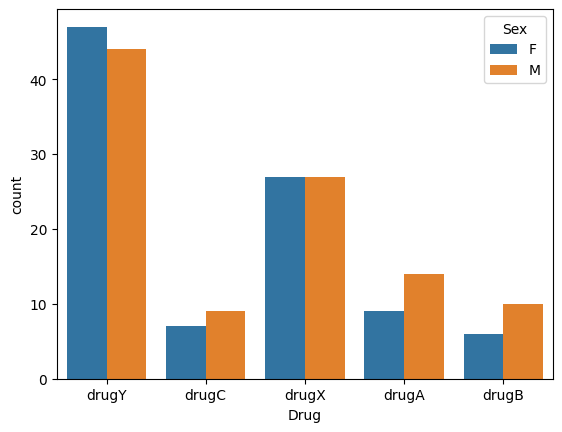

In [192]:
sns.countplot(x = 'Drug', data= data, hue = 'Sex')

In [193]:
data_BP_drug = data.groupby(['Drug','BP']).size().reset_index(name = 'count')
print(data_BP_drug)

    Drug      BP  count
0  drugA    HIGH     23
1  drugB    HIGH     16
2  drugC     LOW     16
3  drugX     LOW     18
4  drugX  NORMAL     36
5  drugY    HIGH     38
6  drugY     LOW     30
7  drugY  NORMAL     23


<Axes: xlabel='Drug', ylabel='count'>

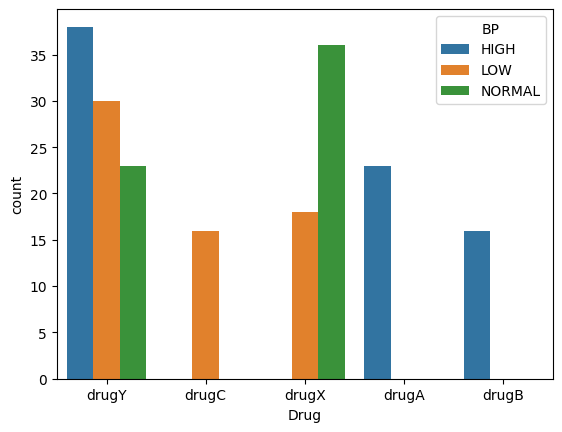

In [194]:
sns.countplot(x = 'Drug', data= data, hue = 'BP')

In [195]:
data_Cholesterol_drug = data.groupby(['Drug','Cholesterol']).size().reset_index(name='count')
print(data_Cholesterol_drug)

    Drug Cholesterol  count
0  drugA        HIGH     12
1  drugA      NORMAL     11
2  drugB        HIGH      8
3  drugB      NORMAL      8
4  drugC        HIGH     16
5  drugX        HIGH     20
6  drugX      NORMAL     34
7  drugY        HIGH     47
8  drugY      NORMAL     44


<Axes: xlabel='Drug', ylabel='count'>

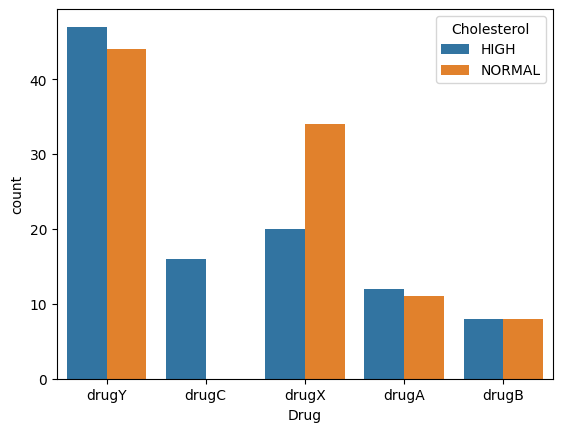

In [196]:
sns.countplot(x = 'Drug', data= data, hue = 'Cholesterol')

In [197]:
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})
data['Cholesterol'] = data['Cholesterol'].map({'HIGH' : 1, 'NORMAL' : 0})
data['Drug'] = data['Drug'].map({'drugY':1, 'drugC':2, 'drugX':3, 'drugA':4, 'drugB':5})
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,1,25.355,1
1,47,1,LOW,1,13.093,2
2,47,1,LOW,1,10.114,2
3,28,0,NORMAL,1,7.798,3
4,61,0,LOW,1,18.043,1


In [198]:
data.shape

(200, 6)

In [199]:
data = pd.get_dummies(data)
data.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL
0,23,0,1,25.355,1,1,0,0
1,47,1,1,13.093,2,0,1,0
2,47,1,1,10.114,2,0,1,0
3,28,0,1,7.798,3,0,0,1
4,61,0,1,18.043,1,0,1,0


In [200]:
data.shape

(200, 8)

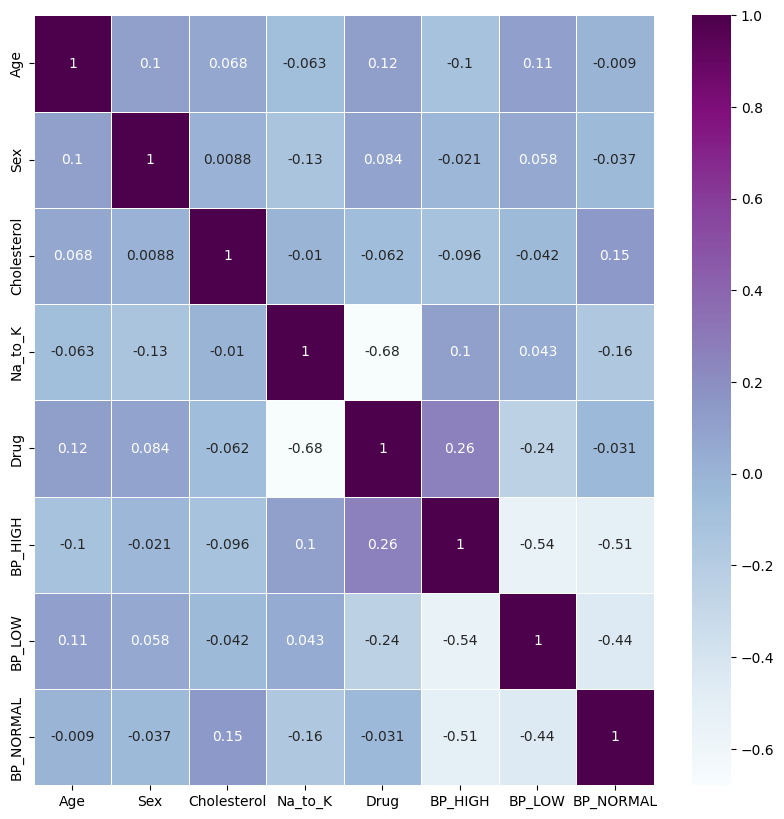

In [201]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(data.corr(), cmap = 'BuPu', cbar = True, linewidth = 0.5, annot = True)
plt.show()

In [202]:
X = data.drop('Drug', axis = 1).values
y = data['Drug'].values.reshape((-1,1))

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=None,shuffle=True,stratify=None)
print('x train shape {}'.format(X_train.shape))
print('x test shape {}'.format(X_test.shape))
print('y train shape {}'.format(y_train.shape))
print('y test shape {}'.format(y_test.shape))

x train shape (160, 7)
x test shape (40, 7)
y train shape (160, 1)
y test shape (40, 1)


In [205]:
from sklearn.naive_bayes import GaussianNB

In [206]:
# classificador logreg
GNB = GaussianNB()
# Fitting with train data
model = GNB.fit(X_train, y_train)

In [207]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.75


In [212]:
y_pred = model.predict(X_test)
print('\nAccuracy of Naive Bayes classifier on test set: {:.2f}'.format(accuracy_score(y_pred,y_pred,normalize=True,sample_weight=None)))


Accuracy of Naive Bayes classifier on test set: 1.00


In [213]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [214]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 8  0  2  4  2]
 [ 0  6  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0  4]]
              precision    recall  f1-score   support

           1       1.00      0.50      0.67        16
           2       1.00      1.00      1.00         6
           3       0.83      1.00      0.91        10
           4       0.50      1.00      0.67         4
           5       0.67      1.00      0.80         4

    accuracy                           0.80        40
   macro avg       0.80      0.90      0.81        40
weighted avg       0.88      0.80      0.79        40

